# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# в файле данные без табуляции. для краткости кода оставляю второй вызов с sep='\t'


In [2]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Уже заметны пропуски в полях. Посмотрим на них детальнее

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

parks_nearest и ponds_nearest - поля, где больше всех пропусков. Попробуем посмотреть дубли

In [4]:
print('Дублей найдено в файле:', df.duplicated().sum())

Дублей найдено в файле: 0


Выглядит довольно хорошо, но это не исключает неявные дубли. Посмотрим на общую гистограму для файла

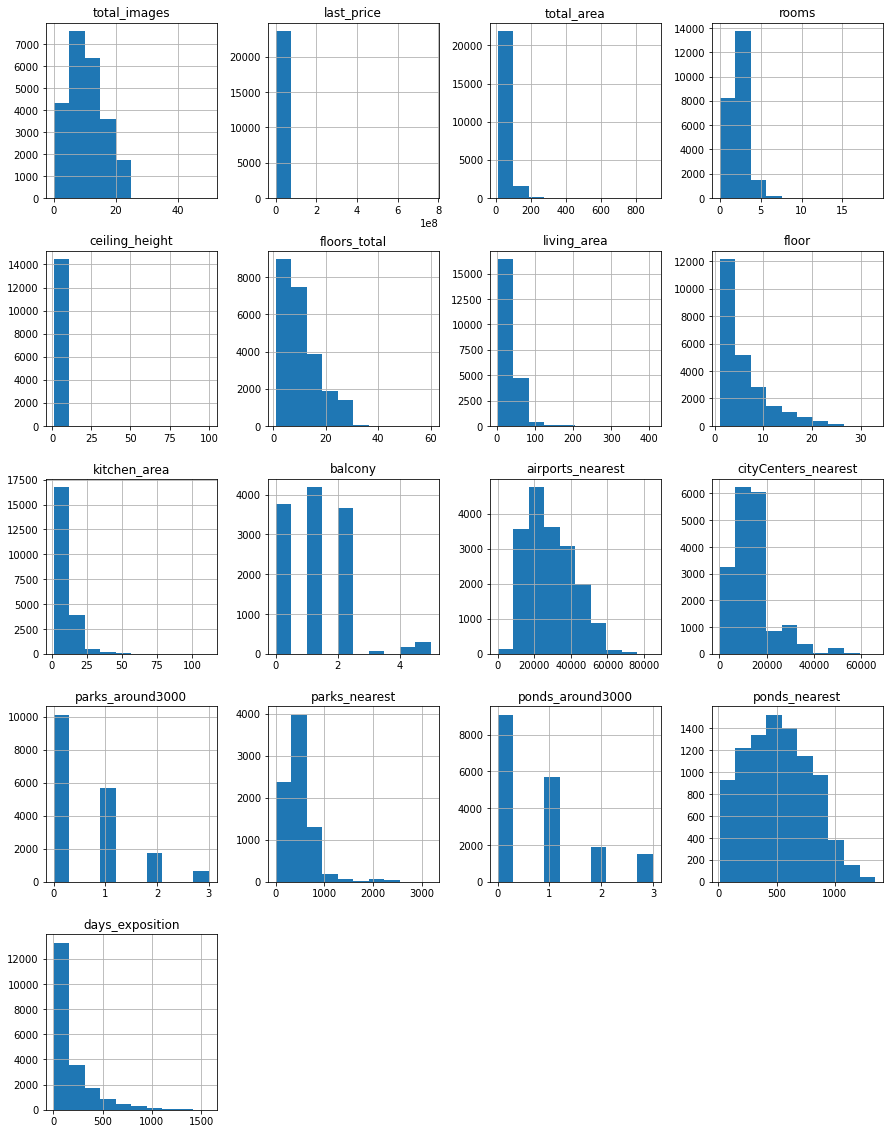

In [5]:
df.hist(figsize=(15, 20));

Пока данные на гистограмме кажутся страными и часть не построилась. Мы вернемся к этому результату позже. Для полноты анализа, посмотрим еще и через df.describe()

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть довольно странные как минимальные, так и максимальные значения.

Если кратко резюмировать информацию, которую мы получили, то:
- Есть пропуски в данных
- Есть аномальные значения
- Нет явных дублей
- Есть проблемы с типом полей

### Предобработка данных

Первое, что может вызвать проблему - это неявные дубли. Попробуем избавитьсяот подобных данных. Если числа могут быть не уникальными, то название населенных пунктов должно быть приведено к одному типу. Проверим этот столбец

In [7]:
print('Количество уникальных значений', len(set(df['locality_name'])))
display(df['locality_name'].unique())

Количество уникальных значений 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Большой список, однако 'посёлок' и 'поселок' тут явно повторяются. Уберем похожие значения и сократим название локации, оставив его без категорий

In [8]:
#сокращаем названия    # к сожалению плоха в регулярках, просьба подсказать, как упростить. Спасибо
df['locality_name'] = df['locality_name'].str.replace("посёлок", "поселок")
df['locality_name'] = df['locality_name'].str.replace("садовое товарищество ", "")
df['locality_name'] = df['locality_name'].str.replace("коттеджный поселок ", "")
df['locality_name'] = df['locality_name'].str.replace("городской поселок ", "")
df['locality_name'] = df['locality_name'].str.replace("поселок городского типа ", "")
df['locality_name'] = df['locality_name'].str.replace("поселок при железнодорожной станции ", "")
df['locality_name'] = df['locality_name'].str.replace("садоводческое некоммерческое товарищество ", "")
df['locality_name'] = df['locality_name'].str.replace("поселок станции ", "")
df['locality_name'] = df['locality_name'].str.replace("деревня ", "")
df['locality_name'] = df['locality_name'].str.replace("поселок ", "")
df['locality_name'] = df['locality_name'].str.replace("село ", " ")

#смотрим кол-во уникальных
print('Количество уникальных значений', len(set(df['locality_name'])))

#проверим, есть ли где-то кроме питера высокие здания
print('Многоэтажки в поселках', 
      len(df.loc[(~(df['locality_name'] == 'Санкт-Петербург') & df['floors_total'] > 20)]))
print('Ошибочно проставленные этажи', 
      len(df.loc[(df['floors_total'] < df['floor'])])) # Возможно это лишнее, но данные разные бывают

Количество уникальных значений 308
Многоэтажки в поселках 0
Ошибочно проставленные этажи 0


Т.к у нас в датасете много сел, поселкой и тд, то хотелось посмотреть нет ли логических несостыковок. Очень маловероятно, что в селе будет построена многоэтажка ~20 этажей. Все высотные здания распределены на Питер. Значит, нет ошибочных данных на удаление.
Кол-во дублей сократилось с 365 до 308

Начнем разбираться с пропусками в данных и исправим некоторые типы столбцов.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

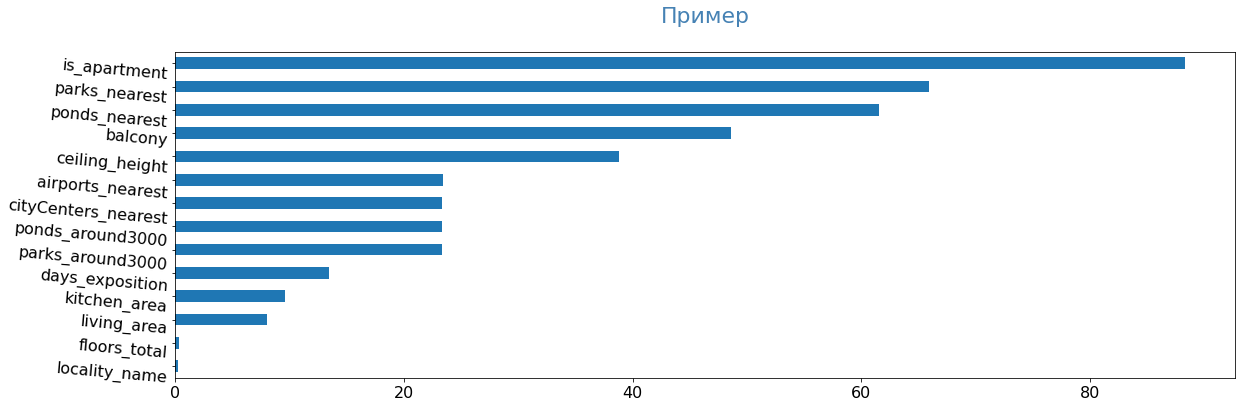

In [11]:
pass_value_barh(df)

In [12]:
#Для этих полей нет пропусков, поэтому просто поменяем тип столбцов
#изменим формат на дату. исправим на числовой формат цену
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df['last_price'] = df['last_price'].astype('int')

#Обработаем пропуски
#начнем с простых, как, например, с балконами
df['balcony'] = df['balcony'].fillna(0).astype('int')
# Т.к есть в апартаментах только False  True, то проставим False для пустых значений
df['is_apartment'] = df['is_apartment'].fillna(value=False).astype('bool')

#в этих столбцах мало null значений, дума, можно удалить без потери качества данных
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)# большая часть приходится на Питерские квартиры, а их много - не должно сильно влиять 

#изменим тип для парков и прудов
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

#на всякий случай проверим взаимосвязь на нахождение пруда/парка рядом и ближе 3км
print('Парки, ближе 3км, но не проставлены в колонке', 
      len(df.loc[(df['parks_around3000'].isna()) & (df['parks_nearest'] <= 3000)]))
print('Проверка, что есть рядом парк', 
      len(df.loc[(df['parks_nearest'].isna()) & (df['parks_around3000'] != 0)]))

print('Пруд, ближе 3км, но не проставлен в колонке', 
      len(df.loc[(df['ponds_around3000'].isna()) & (df['ponds_nearest'] <= 3000)]))
print('Проверка, что есть рядом пруд', 
      len(df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000'] != 0)]))

# меняем студии, но 0 комнат на 1 комнату
df.loc[(df['rooms'] == 0) & (df['studio']==True), 'rooms'] = 1



#new 
#для пустых кухонь в студиях 0 площадь
df.loc[df['studio'] == True, 'kitchen_area'] = 0
#изменен тип 
df['floors_total'] = df['floors_total'].astype('int')


Парки, ближе 3км, но не проставлены в колонке 0
Проверка, что есть рядом парк 0
Пруд, ближе 3км, но не проставлен в колонке 0
Проверка, что есть рядом пруд 0


In [13]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21489 non-null  float64       
 13  balcony         

In [14]:
#удалила такие данные
df = df.loc[~(df['total_area']*0.9 <= (df['living_area'] + df['kitchen_area']))]


In [15]:
# check
df.shape[0]

23088

#### check area

Отлично, ошибочно не проставленных данных нет. Для парков, прудов, аэропортов есть пустые значения, но мы не будем их заполнять, т.к они мало повлияют на исследование. Заполним 0 только для полей с 3км.

Попробуем найти аномалии в данных. Будем отталкиваться от df.describe(), которое вызывали ранее.
Особое внимание нужно уделить ceiling_height, total_area, last_price, rooms, kitchen_area, living_area, days_exposition, а поле total_images не будет существенно влиять на дальнейшие расчеты

Построим для них графики до и после транформаций.

Text(0.5, 1.0, 'ceiling_height')

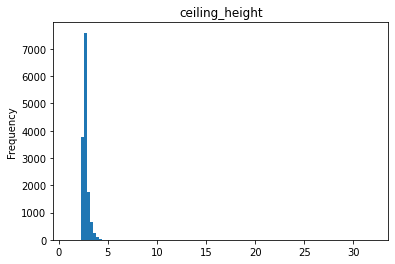

In [16]:
# график для ceiling_height
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 100, 
                                        range=(df['ceiling_height'].min(),df['ceiling_height'].max()))
plt.title('ceiling_height')

Обычный стандарт - это 2,5-2,8м. Некоторые значения выглядят, будто у них ошибочно поставлена точка после второго знака. Уберем аномально большие и маленькие.

In [17]:
#Заполним медианой
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
# "подвинем" точку
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] / 10


In [18]:
df['ratio'] = df['living_area'] / df['total_area']

for r in df['rooms'].unique():
    median = df.loc[df['rooms'] == r, 'ratio'].median()
    df.loc[(df['ratio'].isna()) & (df['rooms'] == r), 'ratio'] = median

fltr = df['living_area'].isna()
df.loc[fltr, 'living_area'] = df.loc[fltr, 'total_area'] * df.loc[fltr, 'ratio']


df['ratio'] = df['kitchen_area'] / df['total_area']

for r in df['rooms'].unique():
    median = df.loc[df['rooms'] == r, 'ratio'].median()
    df.loc[(df['ratio'].isna()) & (df['rooms'] == r), 'ratio'] = median

fltr = df['kitchen_area'].isna()
df.loc[fltr, 'kitchen_area'] = df.loc[fltr, 'total_area'] * df.loc[fltr, 'ratio']


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


#### check area

In [19]:
#удалила такие данные
df.loc[(df['total_area']*0.9 <= (df['living_area'] + df['kitchen_area']))]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio
424,14,11500000,98.0,2016-05-10,3,2.65,3,88.0,3,False,...,1,Санкт-Петербург,39363.0,13270.0,0,NaN,0,NaN,90.0,0.128205
1280,10,2200000,23.0,2018-03-06,1,2.65,24,17.0,21,False,...,0,Мурино,NaN,NaN,0,NaN,0,NaN,42.0,0.245283
1544,8,3300000,26.0,2018-03-15,1,2.65,16,20.0,6,False,...,0,Санкт-Петербург,8340.0,11992.0,2,20.0,1,197.0,193.0,0.245283
1645,5,1625000,27.0,2018-02-13,1,2.65,5,18.1,3,False,...,0,Низино,NaN,NaN,0,NaN,0,NaN,87.0,0.245283
1655,1,2350000,22.0,2019-04-08,1,2.50,12,14.5,10,False,...,0,Колпино,28422.0,34208.0,0,NaN,0,NaN,16.0,0.245283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,8,10965000,69.3,2019-01-10,1,3.00,4,48.9,4,True,...,2,Зеленогорск,73391.0,54490.0,3,4.0,1,217.0,110.0,0.245283
23102,0,5800000,66.0,2017-06-09,5,2.65,5,55.5,1,False,...,0,Санкт-Петербург,12007.0,11933.0,0,NaN,0,NaN,21.0,0.103721
23191,3,1900000,18.9,2016-04-04,1,2.65,16,16.0,12,False,...,0,Тосно,NaN,NaN,0,NaN,0,NaN,115.0,0.245283
23420,1,3345000,29.9,2018-08-09,1,2.65,27,20.3,3,False,...,1,Парголово,52912.0,19089.0,0,NaN,0,NaN,247.0,0.245283


Text(0.5, 1.0, 'ceiling_height')

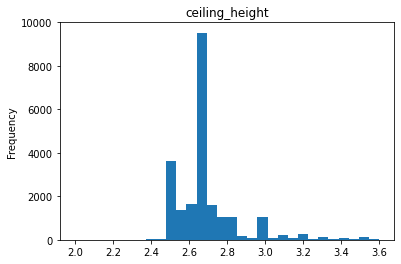

In [20]:
#Удалим аномалии. 
#оставила последовательно по одному условию, т.к мониторила их каждое отдельно, сколько удаляет записей
df = df.query('(ceiling_height <=3.60)')
df = df.query('(ceiling_height >=2)')

#В датасете есть небольшое кол-во строк, где кухни больше жилой территории. Уберем такие строки
df=df.query('living_area > kitchen_area')

#построим новый график
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, 
                                        range=(df['ceiling_height'].min(),df['ceiling_height'].max()))
plt.title('ceiling_height')


Уберем лишние значения для total_area. На сырых данных видно, что >300 уже аномальные значения. Построим новый график для сравнения

Text(0.5, 1.0, 'total_area')

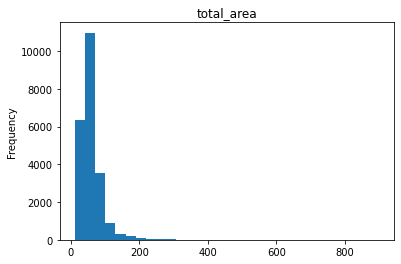

In [21]:
#старый график для total_area
df['total_area'].sort_values().plot(y = 'total_area', kind = 'hist', bins = 30, 
                                    range=(df['total_area'].min(),df['total_area'].max()))
plt.title('total_area')


Text(0.5, 1.0, 'total_area')

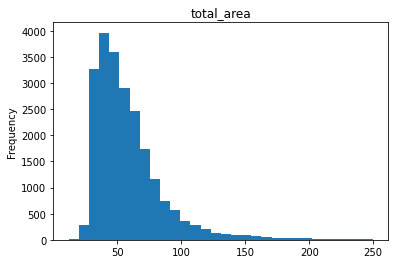

In [22]:
#убираем записи
df=df.query('(total_area < 250)')
#новый график для total_area
df['total_area'].sort_values().plot(y = 'total_area', kind = 'hist', bins = 30, 
                                    range=(df['total_area'].min(),df['total_area'].max()))
plt.title('total_area')

График для last_price показывает, что есть очень большие значения, которые "растягивают" график. Основываясь на df.describe(), попробуем сократить выборку

Text(0.5, 1.0, 'last_price')

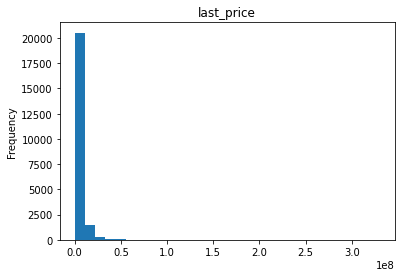

In [23]:
#старый график для last_price
df['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 30, 
                                    range=(df['last_price'].min(),df['last_price'].max()))
plt.title('last_price')

Text(0.5, 1.0, 'last_price')

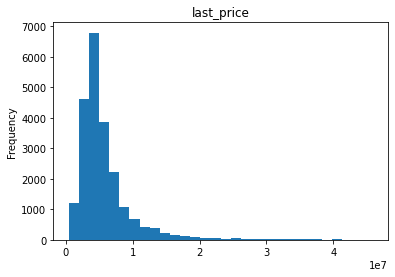

In [24]:
#записи убираем
df=df.query('(last_price < 46000000)')  

#новый график для last_price
df['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 30, 
                                    range=(df['last_price'].min(),df['last_price'].max()))
plt.title('last_price')

Теперь разберемся с rooms. Часть значений пришлось поменять, т.к ошибочно для студий проставлено 0 комнат, что не совсем логично.

Text(0.5, 1.0, 'rooms')

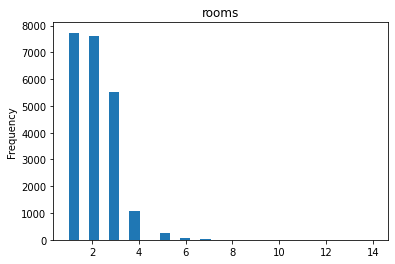

In [25]:
#старый график для rooms
df['rooms'].sort_values().plot(y = 'rooms', kind = 'hist', bins = 30, range=(df['rooms'].min(),df['rooms'].max()))
plt.title('rooms')

Text(0.5, 1.0, 'rooms')

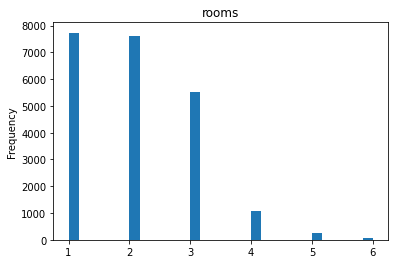

In [26]:
#убираем выбивающиеся значения, основываясь на графике
df = df.query('(rooms <= 6)') 
df = df.query('(rooms > 0)') 

#новый график для rooms
df['rooms'].sort_values().plot(y = 'rooms', kind = 'hist', bins = 30, range=(df['rooms'].min(),df['rooms'].max()))
plt.title('rooms')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22252 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22252 non-null  int64         
 1   last_price            22252 non-null  int64         
 2   total_area            22252 non-null  float64       
 3   first_day_exposition  22252 non-null  datetime64[ns]
 4   rooms                 22252 non-null  int64         
 5   ceiling_height        22252 non-null  float64       
 6   floors_total          22252 non-null  int64         
 7   living_area           22252 non-null  float64       
 8   floor                 22252 non-null  int64         
 9   is_apartment          22252 non-null  bool          
 10  studio                22252 non-null  bool          
 11  open_plan             22252 non-null  bool          
 12  kitchen_area          22252 non-null  float64       
 13  balcony         

Ранее мы уже убрали записи, где были кухни больше жилой площади. Теперь уберем аномальеые значения. 

Text(0.5, 1.0, 'kitchen_area')

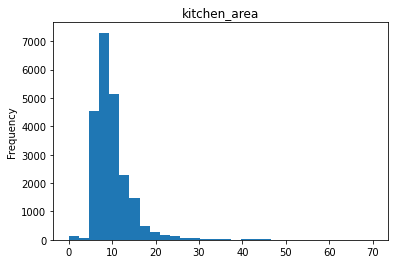

In [28]:
# старый график для kitchen_area
df['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 30, 
                                      range=(df['kitchen_area'].min(),df['kitchen_area'].max()))
plt.title('kitchen_area')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22057 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22057 non-null  int64         
 1   last_price            22057 non-null  int64         
 2   total_area            22057 non-null  float64       
 3   first_day_exposition  22057 non-null  datetime64[ns]
 4   rooms                 22057 non-null  int64         
 5   ceiling_height        22057 non-null  float64       
 6   floors_total          22057 non-null  int64         
 7   living_area           22057 non-null  float64       
 8   floor                 22057 non-null  int64         
 9   is_apartment          22057 non-null  bool          
 10  studio                22057 non-null  bool          
 11  open_plan             22057 non-null  bool          
 12  kitchen_area          22057 non-null  float64       
 13  balcony         

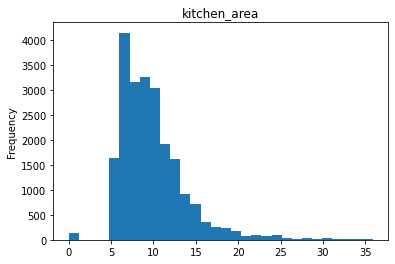

In [29]:
#уберем только аномально большие значения, т.к, например, в студиях, могут быть очень маленькие кухни
df = df.query('(kitchen_area < 36)')

#new_kitchen
df = df.loc[~((df['kitchen_area']<5) & (df['kitchen_area'] > 0))]
             

#новый график для kitchen_area
df['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 30, 
                                      range=(df['kitchen_area'].min(),df['kitchen_area'].max()))
plt.title('kitchen_area')


df.info()

Для days_exposition есть объявления, которые висят уже много месяцев, но, это могут быть просто не закрытые объявления. Отрежем часть таких данных

Text(0.5, 1.0, 'days_exposition')

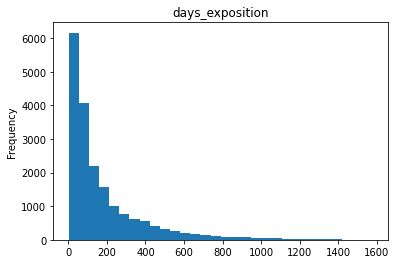

In [30]:
#старый график для days_exposition
df['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 30, 
                                         range=(df['days_exposition'].min(),df['days_exposition'].max()))
plt.title('days_exposition')

#### check nan

In [31]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22057 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22057 non-null  int64         
 1   last_price            22057 non-null  int64         
 2   total_area            22057 non-null  float64       
 3   first_day_exposition  22057 non-null  datetime64[ns]
 4   rooms                 22057 non-null  int64         
 5   ceiling_height        22057 non-null  float64       
 6   floors_total          22057 non-null  int64         
 7   living_area           22057 non-null  float64       
 8   floor                 22057 non-null  int64         
 9   is_apartment          22057 non-null  bool          
 10  studio                22057 non-null  bool          
 11  open_plan             22057 non-null  bool          
 12  kitchen_area          22057 non-null  float64       
 13  balcony         

Text(0.5, 1.0, 'days_exposition')

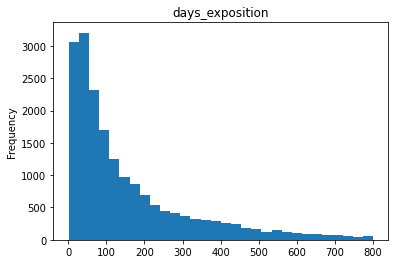

In [32]:
#удаляем часть данных
df = df.query('~(days_exposition > 800)')

#новый график для days_exposition
df['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 30, 
                                         range=(df['days_exposition'].min(),df['days_exposition'].max()))
plt.title('days_exposition')

Text(0.5, 1.0, 'days_exposition')

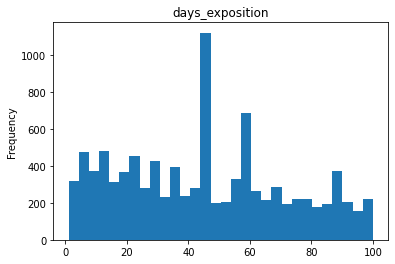

In [33]:
#новый график для days_exposition
df['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 30, 
                                         range=(1,100))
plt.title('days_exposition')

Есть предположение, что отметки в 45, 60, 90 дней - это результат работы алгоритма по закрытию объявлений.
Нашла только такое описание, но оно актуальное. https://yandex.ru/support/realty/paid.html#paid
Какой алгоритм работал в момент выгрузки данных лучше бы уточнить у коллег

In [34]:
# check
df.shape[0]

21516

Есть предположение, что квартиры с большой жилой площадью могут быть редкими, удалим их из выборки.

Text(0.5, 1.0, 'living_area')

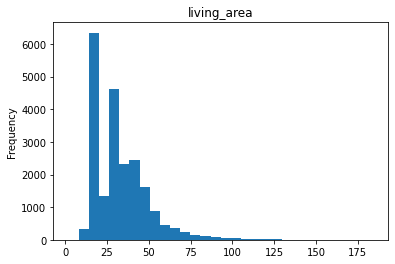

In [35]:
#старый график для living_area
df['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 30, 
                                     range=(df['living_area'].min(),df['living_area'].max()))
plt.title('living_area')

Text(0.5, 1.0, 'living_area')

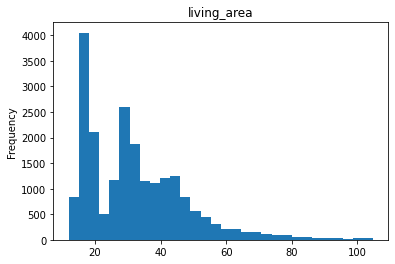

In [36]:
#Убираем аномальные записи для жилой площади
df = df.query('(living_area < 105)') 
df = df.query('(living_area >= 12.0)') #Хоть и комнаты менее 12 метров имеют место быть, но их очень мало

#новый график для days_exposition
df['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 30, 
                                     range=(df['living_area'].min(),df['living_area'].max()))
plt.title('living_area')

Для cityCenters_nearest есть небольшой выброс, который заметен на графике. Минимальные значения оставим, т.к квартира может находиться в центре.

<AxesSubplot:ylabel='Frequency'>

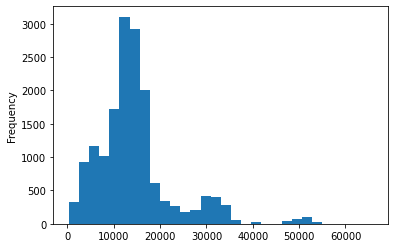

In [37]:
#старый график для cityCenters_nearest      
df['cityCenters_nearest'].sort_values().plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, 
                                             range=(df['cityCenters_nearest'].min(),df['cityCenters_nearest'].max()))


In [38]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21335 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21335 non-null  int64         
 1   last_price            21335 non-null  int64         
 2   total_area            21335 non-null  float64       
 3   first_day_exposition  21335 non-null  datetime64[ns]
 4   rooms                 21335 non-null  int64         
 5   ceiling_height        21335 non-null  float64       
 6   floors_total          21335 non-null  int64         
 7   living_area           21335 non-null  float64       
 8   floor                 21335 non-null  int64         
 9   is_apartment          21335 non-null  bool          
 10  studio                21335 non-null  bool          
 11  open_plan             21335 non-null  bool          
 12  kitchen_area          21335 non-null  float64       
 13  balcony         

Оставим без изменений

In [39]:
# check
df.shape[0]

21335

Мы значительно сократили пропуски в данных, для колонок, для этого:
- floors_total - убрали маленькое кол-во данных с null, где большинство для Питера, что не повлияет на информативность выборки
- living_area - заполнили данными 
- is_apartment - проставили False для пустых значений, т.к мы не можем утверждать аппартаметны это или нет 
- kitchen_area - заполнили данными
- ceiling_height - заполнили данными
- balcony - проставили 0, т.к точное кол-во нельзя уточнить
- locality_name - убрали из выборки, т.к нельзя предугадать что это за город. 
- parks_around3000 - проставили 0, из-за отсутствия информации
- ponds_around3000 - проставили 0, из-за отсутствия информации

Причины пропусков могут быть различными - от человеческого фактора, до сбоя, однако, выглядит так, что данные могли не обновляться какое-то время. Плюс первые 5 столбцов явно в базе с не нулевым типом, т.к это является основной информацией, следовательно, остальные могли заполняться выборочно.

Для balcony, parks_around3000, ponds_around3000, last_price были изменены типы данных, т.к кол-во балконов не может быть дробным, а для остальных полей дробная часть является излишней информацией.

Почистили аномальные данные в полях  ceiling_height, total_area, last_price, rooms, kitchen_area, living_area, days_exposition, cityCenters_nearest. Остальные поля не должны помешать расчетам. 

#### check gap

In [40]:
# check
data = df.copy()

In [41]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21335 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21335 non-null  int64         
 1   last_price            21335 non-null  int64         
 2   total_area            21335 non-null  float64       
 3   first_day_exposition  21335 non-null  datetime64[ns]
 4   rooms                 21335 non-null  int64         
 5   ceiling_height        21335 non-null  float64       
 6   floors_total          21335 non-null  int64         
 7   living_area           21335 non-null  float64       
 8   floor                 21335 non-null  int64         
 9   is_apartment          21335 non-null  bool          
 10  studio                21335 non-null  bool          
 11  open_plan             21335 non-null  bool          
 12  kitchen_area          21335 non-null  float64       
 13  balcony         

In [42]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,335.00","21,335.00","21,335.00","18,473.00","21,335.00","21,335.00","21,335.00","21,335.00","21,335.00"
min,1.00,17.00,2.00,1.00,"430,000.00",12.00,0.00,1.00,1.00
max,6.00,236.00,3.60,800.00,"45,900,000.00",104.80,35.90,33.00,60.00


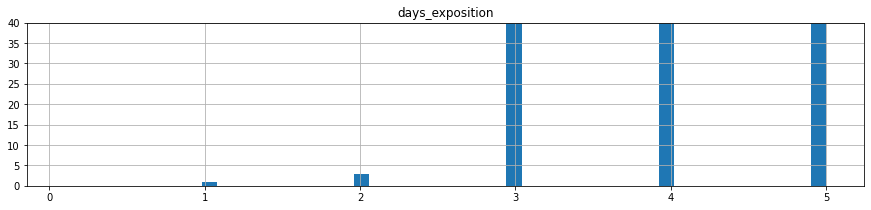

In [43]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5))
plt.ylim(0,40);

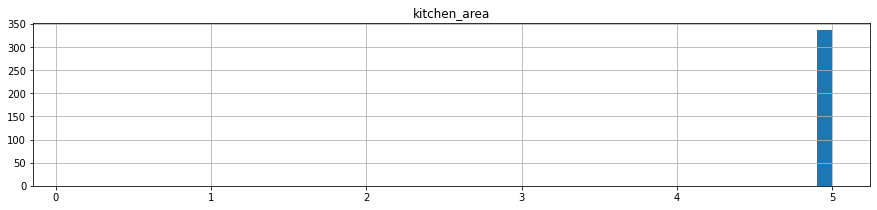

In [44]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0.1,5));

In [45]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7481
2,7385
3,5289
4,972
5,183
6,25


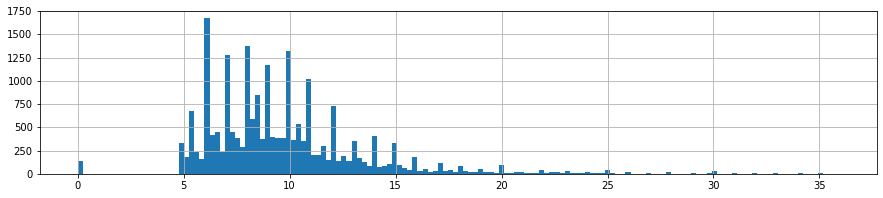

In [46]:
# check
data.kitchen_area.hist(bins = 150, figsize = (15,3));

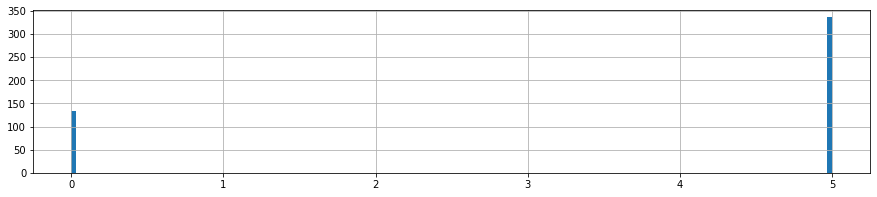

In [47]:
# check
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (0, 5));

<div class="alert alert-d
            anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Осталось завершить выполнение пункта 2.4 из брифа проекта

2.4.	Найдите и устраните редкие и выбивающиеся значения.
        
__Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%__

In [48]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,27.23,2.50,4.00,"1,000,000.00",14.00,5.00,1.00,2.00
0.5,2.00,51.00,2.65,90.00,"4,550,000.00",30.00,9.00,4.00,9.00
0.9,3.00,87.00,2.90,400.80,"9,600,000.00",52.00,14.07,13.00,22.00
0.9976,5.00,170.00,3.52,781.67,"33,800,000.00",99.08,30.98,25.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

 Добавим в выборку данных новые колонки с рассчитанными значениями по следующим метрикам:
 
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [49]:
# цена одного квадратного метра
df['square_meter_cost'] = df['last_price'] / df['total_area']
df['square_meter_cost'] = df['square_meter_cost'].astype(int)

# недели, месяца и года
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

# преобразование этажа
def floor_type(df):
    if df['floor']==1:
        return 'первый'
    elif df['floor']==df['floors_total']:
        return 'последний'
    else:
        return 'другой'
 
df['floor_type']=df.apply(floor_type,axis=1)
    
# расстояние до центра(км)
df['center_km'] = round(df['cityCenters_nearest'] / 1000) #добавила округление


### Проведите исследовательский анализ данных

Ранее мы уже строили графики для определения аномальных значений, теперь будем рассматривать со стороны бизнес-задачи.

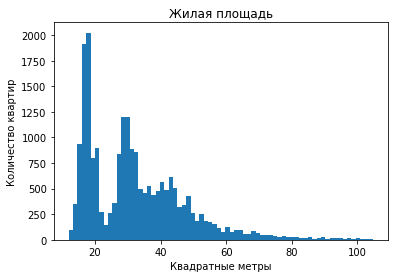

count    21335.000000
mean        32.514990
std         15.543844
min         12.000000
25%         18.700000
50%         30.000000
75%         41.300000
max        104.800000
Name: living_area, dtype: float64

In [50]:
# жилая площадь
plt.hist(df['living_area'], bins=70)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
df['living_area'].describe()

В нашей выборке собраны квартиры с площадью <100кв.м. Чаще всего публиковались квартиры ~20кв.м, но есть и второй пик ближе к 30кв.м. Скорее всего это связанно с тем, что есть популярность у студий(1й пик), а далее чаще покупают однушки. Это проверим чуть позже

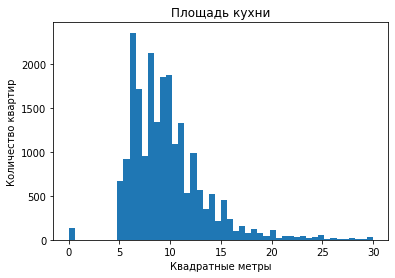

count    21335.000000
mean         9.710297
std          3.895117
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         35.900000
Name: kitchen_area, dtype: float64

In [51]:
# площадь кухни
plt.hist(df['kitchen_area'], bins=50, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
df['kitchen_area'].describe()

Кухни обычно варьируются от 6 до 12м, а более 20м - это уже совсем единичные случаи. Менее 6м могут быть указаны кухни в студиях. 

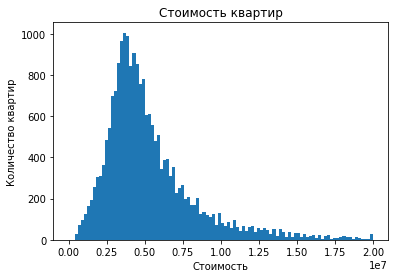

count    2.133500e+04
mean     5.601202e+06
std      4.024951e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      4.590000e+07
Name: last_price, dtype: float64

In [52]:
# Стоимость квартир
plt.hist(df['last_price'], bins=100, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
df['last_price'].describe()

График выглядит не совсем плавным. На это сказалось то, что цена не всегда была округлена. Частый ценник для квартир - 5 миллионов

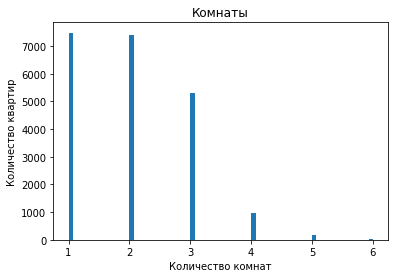

count    21335.000000
mean         2.018795
std          0.936171
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [53]:
# Количество комнат
plt.hist(df['rooms'], bins=70, range=(1,6))
index = [0,1,2,3,4]
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
df['rooms'].describe()

Самые частые в выборке - это однушки и студии(мы их считали за 1 комнату). Довольно часто встречаются 2 и 3 комнаты, а вот 4 и более уже реже.

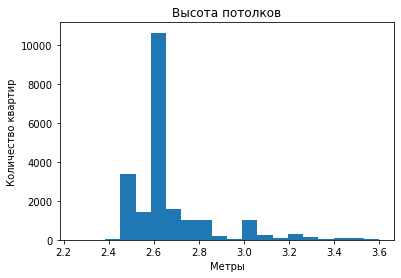

count    21335.000000
mean         2.677545
std          0.173165
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.600000
Name: ceiling_height, dtype: float64

In [54]:
# Высота потолков
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
df['ceiling_height'].describe()

Потолки часто подходят в стандартные 2,5-2,8 но есть и более высокие.  

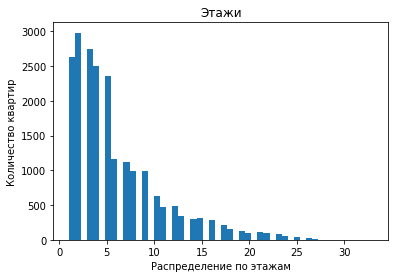

count    21335.000000
mean         5.905086
std          4.867903
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [55]:
# этаж квартиры
plt.hist(df['floor'], bins=50) #, range=(1,3)
plt.title('Этажи')
plt.xlabel('Распределение по этажам')
plt.ylabel('Количество квартир')
plt.show()
df['floor'].describe()

Этажи варьируются от 1-5, далее спад. Возможно, есть большая доля продаж в пятиэтажках(их может быть много в малых городах), а вот квартир в небоскребах совсем мало.

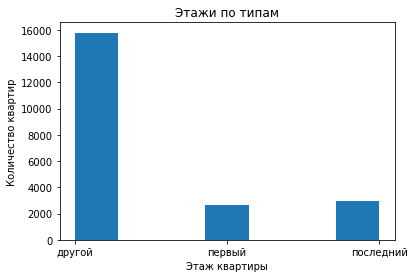

count      21335
unique         3
top       другой
freq       15775
Name: floor_type, dtype: object

In [56]:
# тип квартиры
plt.hist(df['floor_type'], bins=7) #index='floor_type'
plt.title('Этажи по типам')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()
df['floor_type'].describe()

Объем квартир на первом и последнем этажах почти равны, а вот на долю остальной группы пришлось большинство значений.

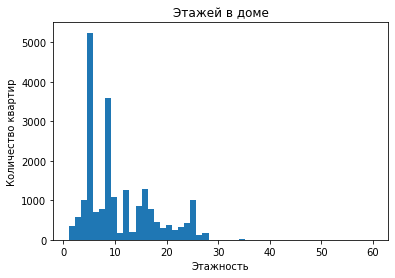

count    21335.000000
mean        10.763581
std          6.574228
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [57]:
# этажей в доме
plt.hist(df['floors_total'], bins=50) #index='floor_type'
plt.title('Этажей в доме')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()
df['floors_total'].describe()

Подтвердилась теория о пятиэтажках - их самое большое кол-во. Далее часто встречаются девятиэтажки 

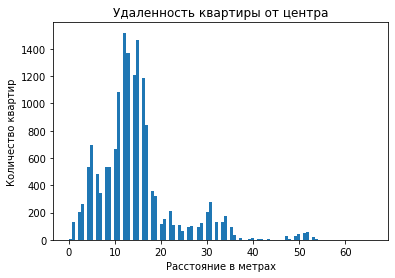

count    16251.000000
mean        14.576088
std          8.510904
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_km, dtype: float64

In [58]:
# расстояние до центра
plt.hist(df['center_km'], bins=100) #index='floor_type'
plt.title('Удаленность квартиры от центра')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
df['center_km'].describe()

По удаленности от центра можно сказать, что довольно широкий диапазон квартир, находящихся в 12-16 км от центра. Есть еще небольшой пик, который говорит нам о продажах квартир в 5-7 км от центра. Остальные менее популярны

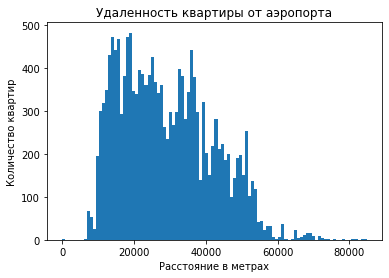

count    16231.000000
mean     28939.608712
std      12807.311971
min          0.000000
25%      18357.500000
50%      27154.000000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64

In [59]:
# расстояние до аэропорта  
plt.hist(df['airports_nearest'], bins=100) #index='floor_type'
plt.title('Удаленность квартиры от аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
df['airports_nearest'].describe()

График совсем не плавный. Скорее всего это связанно с тем, что определенные населенные пункты удалены на конкретное расстояние от аэропорта и там продается большое количество квартир, которое и выливается в пики на графике.

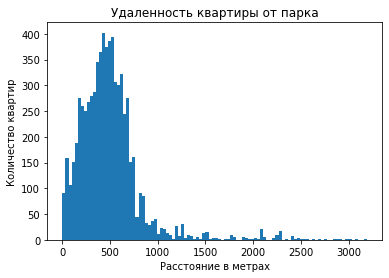

count    7030.000000
mean      492.321479
std       338.127367
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [60]:
# расстояние до парка  
plt.hist(df['parks_nearest'], bins=100) #index='floor_type'
plt.title('Удаленность квартиры от парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
df['parks_nearest'].describe()

Часто парки находятся примерно 400-600м от продаваемых объектов. Более 800м - совсем редкость.

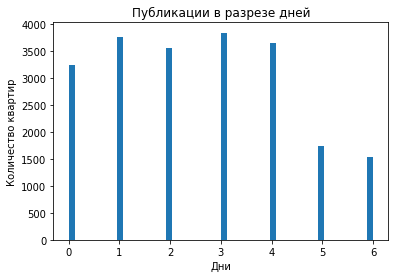

count    21335.000000
mean         2.576424
std          1.791765
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [61]:
# публикации в разрезе дней  
plt.hist(df['weekday'], bins=50) #index='floor_type'
plt.title('Публикации в разрезе дней')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
df['weekday'].describe()

Очевидно, что реже всего выставляются объявления в период выходных, а в четверг и пятницу почти одинакого много.

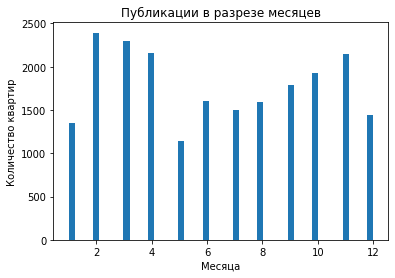

count    21335.000000
mean         6.397985
std          3.487403
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [62]:
#  публикации в разрезе месяцев 
plt.hist(df['month'], bins=50) #index='floor_type'
plt.title('Публикации в разрезе месяцев')
plt.xlabel('Месяца')
plt.ylabel('Количество квартир')
plt.show()
df['month'].describe()

Разрез по месяцам говорит нам, что самое маленькое количество объявлений приходится на май. Интересно, связанно ли это с большим количеством праздников и хорошей погодой? Кто знает) Противоположный по значениям маю - февраль, там больше всего объявлений.

Мы осмыслили важные метрики и теперь можно посмотреть на их зависимость между собой.


Быстрота продаж по времени (медиана): 90 

Быстрота продаж по времени (среднее): 154 



<AxesSubplot:ylabel='Frequency'>

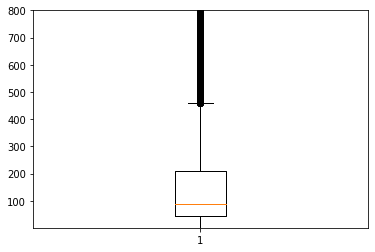

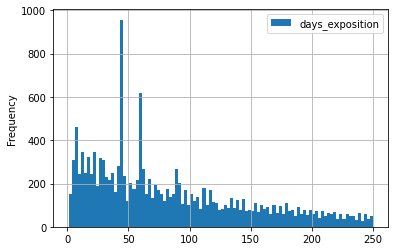

In [63]:
print('Быстрота продаж по времени (медиана):', round(df.query('days_exposition > 0')['days_exposition'].median()),'\n')
print('Быстрота продаж по времени (среднее):', round(df.query('days_exposition > 0')['days_exposition'].mean()),'\n')

plt.boxplot(df[df['days_exposition']>0]['days_exposition'])
plt.ylim(1,800)

df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,250))


Если рассматривать быстроту продаж по времени, то можно сказать, что основная масса продаж приходится на период до 200 дней, от 200-400 уже редкие, а более 500 дней совсем аномальные. При этом медиана равна 90 дням. На этот показатель можно рассчитывать хозяину среднестатистической квартиры при планировании продажи. Однако есть 2 пика - в районе 45 дней и 60. 

Быстрыми можно считать продажи до 50 дней, а необычно долгими >500 дней, если судить по первому графику.

Теперь перейдем к факторам, которые могут повлиять на стоимость объекта

<AxesSubplot:xlabel='total_area'>

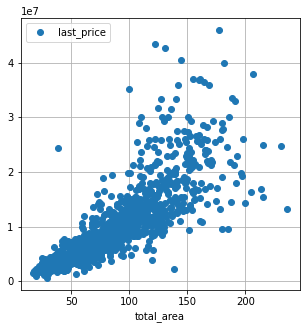

In [64]:
#Выберем отношение цены к общей площади
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))


In [65]:
# new_corr
columns = ['total_area', 'last_price']
subset = df[columns]

subset.corr()

,total_area,last_price
total_area,1.000000,0.759117
last_price,0.759117,1.000000


Корреляции цены к общей площади оказалась довольно сильной - 0.75

<AxesSubplot:xlabel='living_area'>

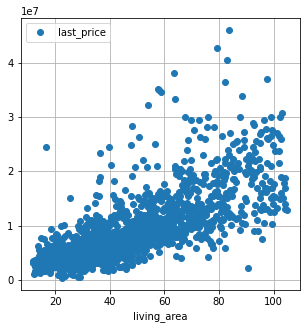

In [66]:
#Выберем отношение к цены к жилой площади
df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))


In [67]:
# new_corr
columns = ['living_area', 'last_price']
subset = df[columns]

subset.corr()

,living_area,last_price
living_area,1.000000,0.661286
last_price,0.661286,1.000000


Жилая площадь имеет влияние на цену - 0,65

<AxesSubplot:xlabel='living_area'>

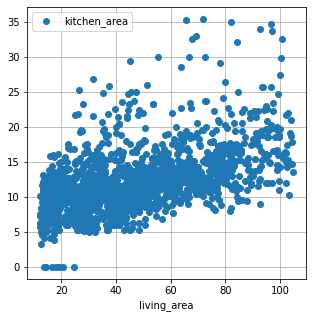

In [68]:
#Выберем отношение цены к площади кухни
df.pivot_table(index='living_area', values='kitchen_area').plot(grid=True, style='o', figsize=(5, 5))


In [69]:
# new_corr
columns = ['living_area', 'kitchen_area']
subset = df[columns]

subset.corr()

,living_area,kitchen_area
living_area,1.000000,0.382336
kitchen_area,0.382336,1.000000


График получился более рассеянным. Зависимости цены от площади кухни крайне мала - 0.34

<AxesSubplot:xlabel='rooms'>

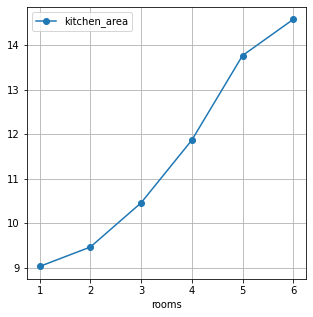

In [70]:
#Выберем отношение цены к комнатам
df.pivot_table(index='rooms', values='kitchen_area').plot(grid=True, style='o-', figsize=(5, 5))


In [71]:
# new_corr
columns = ['living_area', 'rooms']
subset = df[columns]

subset.corr()

,living_area,rooms
living_area,1.000000,0.882184
rooms,0.882184,1.000000


Довольно сильно проявляется рост цены в зависимости от кол-ва комнат(0.88)

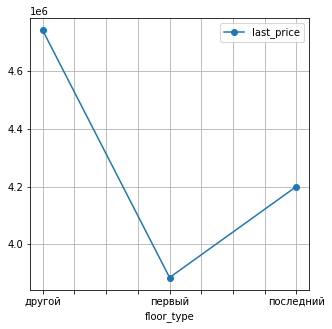

In [72]:
#Выберем отношение цены к типу этажа
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()


Первый этаж оказался дешевле остальных. Далее идет последний этаж, а самые дорогие между ними

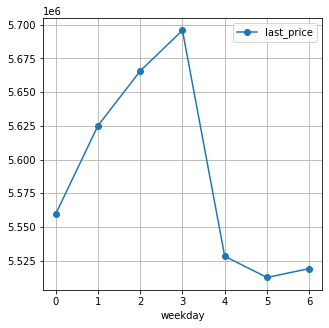

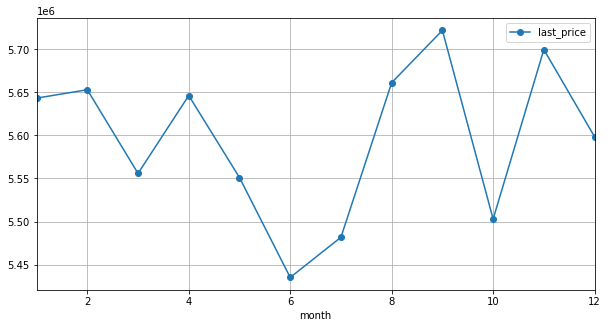

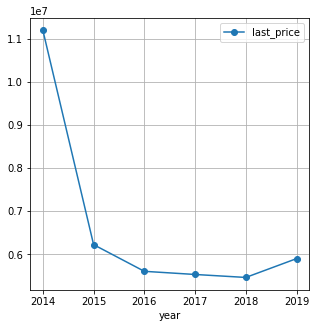

In [73]:
# Зависимость от дня размещения
df.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

plt.show()
# Зависимость от месяца размещения
df.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))

plt.show()
# Зависимость от года размещения
df.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

plt.show()

Дорогие квартиры выставляются в четверг, а вот в воскресенье можно найти квартиру значительно дешевле.
Ноябрь - самый дорогой месяц, а Июнь - самый дешевый.
Если разбирать года, то с 18 года были самые дешевые квартиры, но начался рост к 19. по данным на 14 год нельзя точно что-либо сказать - их очень мало

In [74]:
display(df[df['year']<2015])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio,square_meter_cost,weekday,month,year,floor_type,center_km
260,8,17250000,102.4,2014-12-09,3,2.65,8,53.20,3,False,...,0,NaN,NaN,0.188477,168457,1,12,2014,другой,11.0
411,1,40662000,151.0,2014-12-09,3,2.65,8,85.00,3,False,...,3,100.0,594.0,0.152318,269284,1,12,2014,другой,6.0
532,7,6800000,90.0,2014-12-16,3,2.60,9,43.30,1,False,...,1,837.0,608.0,0.277778,75555,1,12,2014,первый,12.0
617,1,12036000,100.0,2014-11-27,3,2.65,16,52.00,3,False,...,2,454.0,606.0,0.110000,120360,3,11,2014,другой,8.0
653,0,27250000,169.0,2014-12-09,5,2.65,12,89.00,9,False,...,1,69.0,594.0,0.130178,161242,1,12,2014,другой,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19352,4,5500000,53.4,2014-11-29,2,2.75,17,30.04,1,False,...,2,210.0,591.0,0.187828,102996,5,11,2014,первый,17.0
19372,6,7500000,62.2,2014-12-18,5,3.02,6,55.10,1,False,...,1,533.0,694.0,0.103721,120578,3,12,2014,первый,3.0
21039,10,6750000,63.2,2014-12-08,2,2.65,18,37.20,8,False,...,0,NaN,781.0,0.161392,106803,0,12,2014,другой,11.0
21294,0,12300000,103.0,2014-12-09,3,2.65,25,57.00,12,False,...,0,NaN,594.0,0.184466,119417,1,12,2014,другой,15.0


Общий вывод по ценообразованию.
Факторы, которые влияют на цену:
- Общая площадь
- Жилая площадь
- Количество комнат
- Тип этажа, если он не первый и не последний

Факторы, которые не влияют на цену:
- Площади кухни
- Типу этажа (особенно первый)

Я бы предположила, что временные рамки влияют точечно на цены квартир, например, как падение цен после кризиса в 2014. Скорее всего в этот период будет влияние какой-то ситуации извне.

Посмотрим градацию цен по городам

In [75]:
# разбивка на 10 городов
top10_city = df['locality_name'].value_counts().head(10)
city_cost = df.query('locality_name in (@top10_city.index)').pivot_table(values='square_meter_cost', index='locality_name')
city_cost = city_cost.astype(int)
city_cost.sort_values('square_meter_cost', ascending=False)

,square_meter_cost
locality_name,
Санкт-Петербург,110352
Пушкин,102177
Кудрово,95213
Парголово,89558
Мурино,85486
Шушары,77961
Колпино,75322
Гатчина,68970
Всеволожск,68363


Логично, что в Питере будут самые дорогие жилплощади, это мы и увидели на примере нашего датасета. А в Выборге получились одни из дешевых квадратных метров.

Посмотрим как дорожают квартиры, находясь ближе к центру в Санкт-Петербурге

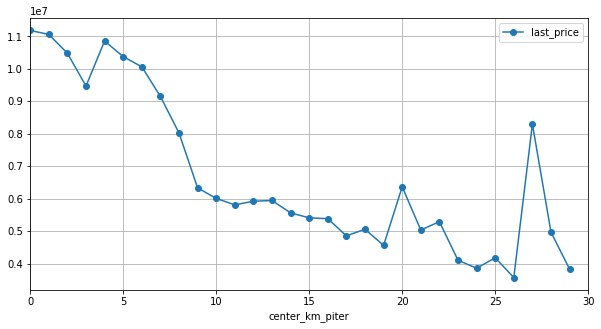

In [76]:
df['center_km_piter'] = df['cityCenters_nearest'] / 1000 # на всякий сохраним в отдельный столбец
df['center_km_piter'] = df['center_km_piter'].fillna(value=0).astype(int)

df.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km_piter', values='last_price').plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5))

plt.show()

Соответственно самая дорогая недвижимость в центре Питера, далее идет небольшой спад, возможно, связанный с определенными районами, а далее опять подьем. Снижение цены плавно начинается от 6км, а после 9км не имеет большого роста и колеблется в небольших диапазонах.

Выброс обусловлен тем, что в 27 км находится один и один из дорогих объектов недвижимости

### Общий вывод

Частыми для продажи являются квартиры до 3х комнат.

Цена среднестатистических квартир варьируется до 5 миллионов

Потолки редко превышают 3м, обычно укладываются в стандарт до 2,8м

По удаленности от аэропорта нельзя однозначно сказать имеет ли этот фактор значение

Довольно много квартир предлагаются к продаже до 5го этажа включительно

В основной массе, квартиры предлагаются в пятиэтажках и девятиэтажках

Квартиры имеют разное удаление от центра, но много предложений в диапазонах 5-7 км и 12-16км. Могут влиять определенные районы

Довольно много квартир, где парки ближе 500м

В разные временные отрезки выкладывают разное кол-во квартир. Например, меньше всего выкладывают в выходные, а в разрезе месяца - май

Ориентироваться на продажу квартиры нужно в 90 дней, хотя нормальное ожидание длится до 200

Увеличение цены точно зависит от общей, жилой площади, кол-ва комнат и не крайних этажей

Снижается цена за счет площади кухни и первого этажа.

По ценообразованию самым просевшим годом оказался 2018, а с 19 года начался небольшой рост

По населенным пунктам Питер является самым догорим для покупки жилья(110977), а вот Выборг довольно экономичен(57945)

Логичный вывод, что самые дорогие квартиры - это центр Питера, но еще есть пик цен в 4 км от центра. Возможно, там просто шикарный район) После 9км от центра цена будет приблизительно одинаковой